# US Gun Deaths Project

## Setting up a file by
<br> a) importing csv module & matplotlib module (for visualisations)
<br> b) opening & reading guns.csv file
<br> c) converting the csv file into the list
<br> d) seperating headers and main body of the data

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
f = open("guns.csv", "r")
csvreader = csv.reader(f)
data = list(csvreader)
headers = data[:1]
data = data[1:20]
data

[['1',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '34',
  'Asian/Pacific Islander',
  '100',
  'Home',
  '4'],
 ['2', '2012', '01', 'Suicide', '0', 'F', '21', 'White', '100', 'Street', '3'],
 ['3',
  '2012',
  '01',
  'Suicide',
  '0',
  'M',
  '60',
  'White',
  '100',
  'Other specified',
  '4'],
 ['4', '2012', '02', 'Suicide', '0', 'M', '64', 'White', '100', 'Home', '4'],
 ['5',
  '2012',
  '02',
  'Suicide',
  '0',
  'M',
  '31',
  'White',
  '100',
  'Other specified',
  '2'],
 ['6',
  '2012',
  '02',
  'Suicide',
  '0',
  'M',
  '17',
  'Native American/Native Alaskan',
  '100',
  'Home',
  '1'],
 ['7',
  '2012',
  '02',
  'Undetermined',
  '0',
  'M',
  '48',
  'White',
  '100',
  'Home',
  '2'],
 ['8',
  '2012',
  '03',
  'Suicide',
  '0',
  'M',
  '41',
  'Native American/Native Alaskan',
  '100',
  'Home',
  '2'],
 ['9',
  '2012',
  '02',
  'Accidental',
  '0',
  'M',
  '50',
  'White',
  '100',
  'Other specified',
  '3'],
 ['10', '2012', '02', 'Suicide', '0', 'M', 'NA',

## Counting Gun Deaths By Year

In [2]:
years = [row[1] for row in data]
years_counts = {}

for year in years:
    if year not in years_counts:
        years_counts[year] = 0
    years_counts[year] += 1

years_counts

{'2012': 33563, '2013': 33636, '2014': 33599}

## Counting Gun Deaths By Gender

In [3]:
genders = [row[5] for row in data]
genders_count = {}
for gender in genders:
    if gender not in genders_count:
        genders_count[gender] = 1
    else:
        genders_count[gender] += 1
print (genders_count)

{'M': 86349, 'F': 14449}


## Counting Gun Deaths By Race

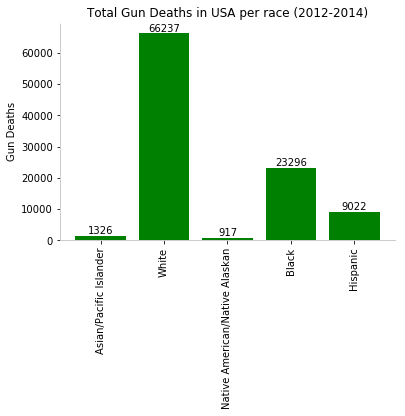

In [4]:
races = [row[7] for row in data]
race_counts = {}
for race in races:
    if race not in race_counts:
        race_counts[race] = 1
    else:
        race_counts[race] += 1
        
fig, ax = plt.subplots()        
rects = ax.bar(range(len(race_counts)), race_counts.values(), align="center", color="green")
ax.set_title("Total Gun Deaths in USA per race (2012-2014)")
ax.set_ylabel("Gun Deaths")
plt.xticks(range(len(race_counts)), list(race_counts.keys()), rotation=90)

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)
        
        ax.text(rect.get_x() + rect.get_width()/2., height + 10, 
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects,ax)

ax.spines["top"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

plt.show()


## Importing and Reading Another Dataset

In [6]:
f = open("census.csv", "r")
readcsv = csv.reader(f)
census = list(readcsv)
census

[['Id',
  'Year',
  'Id',
  'Sex',
  'Id',
  'Hispanic Origin',
  'Id',
  'Id2',
  'Geography',
  'Total',
  'Race Alone - White',
  'Race Alone - Hispanic',
  'Race Alone - Black or African American',
  'Race Alone - American Indian and Alaska Native',
  'Race Alone - Asian',
  'Race Alone - Native Hawaiian and Other Pacific Islander',
  'Two or More Races'],
 ['cen42010',
  'April 1, 2010 Census',
  'totsex',
  'Both Sexes',
  'tothisp',
  'Total',
  '0100000US',
  '',
  'United States',
  '308745538',
  '197318956',
  '44618105',
  '40250635',
  '3739506',
  '15159516',
  '674625',
  '6984195']]

## Computing Rates of Gun Deaths For Every Race

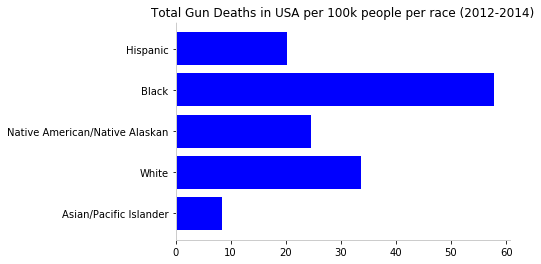

In [7]:
mapping = {
    "Asian/Pacific Islander": 15159516 + 674625,
    "Black": 40250635,
    "Native American/Native Alaskan": 3739506,
    "Hispanic": 44618105,
    "White": 197318956
}

race_per_hundredk = {}
for key, value in race_counts.items():
    race_per_hundredk[key] = (value / mapping[key]) * 100000


fig, ax = plt.subplots()
plt.title("Total Gun Deaths in USA per 100k people per race (2012-2014)")
rects = ax.barh(range(len(race_per_hundredk)), race_per_hundredk.values(), color="blue")
plt.yticks(range(len(race_per_hundredk)), list(race_per_hundredk.keys()))

ax.spines["top"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

labels = [race_per_hundredk.values()]

plt.show()

## Findings so far
Gun Deaths are affecting:
    <ol>
        <li> men much more than women (Almost 6x more men than women).
        <li> black minority much more than other minorities
    

## Filtering Gun Deaths Per Minorities By Intent

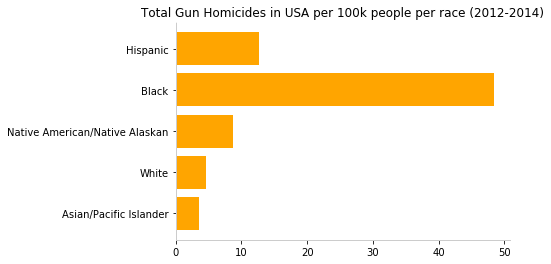

In [8]:
intents = [row[3] for row in data]
homicide_race_counts = {}

for i, race in enumerate(races):
    if intents[i] == "Homicide":
        homicide_race_counts[race] += 1
    if race not in homicide_race_counts:
        homicide_race_counts[race] = 0

homicide_race_per_hundredk = {}
for key, value in homicide_race_counts.items():
    homicide_race_per_hundredk[key] = (value / mapping[key]) * 100000
homicide_race_per_hundredk

fig, ax = plt.subplots()
plt.title("Total Gun Homicides in USA per 100k people per race (2012-2014)")

rects = ax.barh(range(len(homicide_race_per_hundredk)), homicide_race_per_hundredk.values(), color="orange")
plt.yticks(range(len(homicide_race_per_hundredk)), list(homicide_race_per_hundredk.keys()))

ax.spines["top"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

labels = [homicide_race_per_hundredk.values()]

plt.show()

## Finding link between month and homicide rate

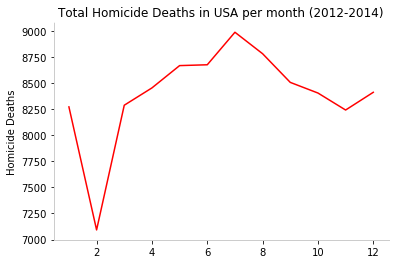

In [9]:
months = [row[2] for row in data]
homicides_per_month = {}

for month in months:
    if month not in homicides_per_month:
        homicides_per_month[month] = 0
    else:
        homicides_per_month[month] += 1
        
x_values = list(homicides_per_month.keys())
y_values = list(homicides_per_month.values())
        
fig, ax = plt.subplots()  

rects = ax.plot(x_values, y_values, color="red")
ax.set_title("Total Homicide Deaths in USA per month (2012-2014)")
ax.set_ylabel("Homicide Deaths")

ax.spines["top"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

plt.show()
        

## Finding link between gender and homicidal rate

In [10]:
genders = [row[5] for row in data]
homicide_gender_count = {}

for i, gender in enumerate(genders):
    if intents[i] == "Homicide":
        homicide_gender_count[gender] += 1
    if gender not in homicide_gender_count:
        homicide_gender_count[gender] = 0

homicide_gender_count

{'F': 5373, 'M': 29803}

## Findings so far
<ul> 
    <li> The black minority is extremely disproportionally affected by homicides committed by guns
    <li> Regarding the seasonality, the number of homicides by gun is peaking at summer and declining at winter.
    <li> Number of male victims from gun homicides is much larger than number of female victims (Almost 6x)

## Exploring the rates of suicides by gender

In [11]:
genders = [row[5] for row in data]
intents = [row[3] for row in data]
suicide_by_gender_count = {}

for i, gender in enumerate(genders):
    if gender not in suicide_by_gender_count:
        suicide_by_gender_count[gender] = 0
    if intents[i] == "Suicide":
        suicide_by_gender_count[gender] += 1
suicide_by_gender_count

{'F': 8689, 'M': 54486}

## Exploring the rates of suicides by race

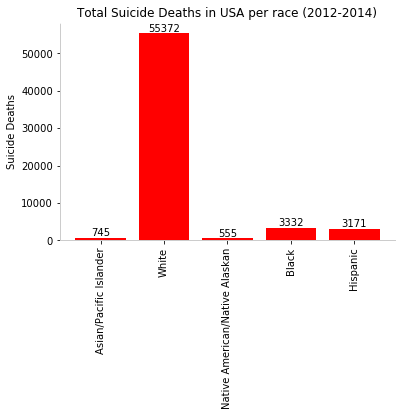

In [12]:
races = [row[7] for row in data]
intents = [row[3] for row in data]
suicide_by_race_count = {}

for i, race in enumerate(races):
    if race not in suicide_by_race_count:
        suicide_by_race_count[race] = 0
    if intents[i] == "Suicide":
        suicide_by_race_count[race] += 1

fig, ax = plt.subplots()        
rects = ax.bar(range(len(suicide_by_race_count)), suicide_by_race_count.values(), align="center", color="red")
ax.set_title("Total Suicide Deaths in USA per race (2012-2014)")
ax.set_ylabel("Suicide Deaths")
plt.xticks(range(len(suicide_by_race_count)), list(suicide_by_race_count.keys()), rotation=90)

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)
        
        ax.text(rect.get_x() + rect.get_width()/2., height + 10, 
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects,ax)

ax.spines["top"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

plt.show()


## Exploring the relationship(correlation) between gun death rates and location

In [13]:
locations = [row[9] for row in data]
location_death_count = {}

for location in locations:
    if location not in location_death_count:
        location_death_count[location] = 0
    location_death_count[location] += 1
location_death_count


{'Farm': 470,
 'Home': 60486,
 'Industrial/construction': 248,
 'NA': 1384,
 'Other specified': 13751,
 'Other unspecified': 8867,
 'Residential institution': 203,
 'School/instiution': 671,
 'Sports': 128,
 'Street': 11151,
 'Trade/service area': 3439}

## Exploring the relationship(correlation) between gun death rates and education

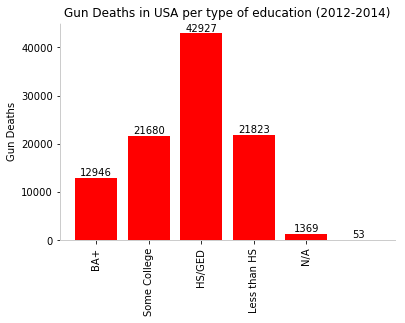

In [26]:
locations = [row[9] for row in data]
educations = [row[10] for row in data]
education_death_count = {}

for education in educations:
    if education not in education_death_count:
        education_death_count[education] = 0
    education_death_count[education] += 1
education_death_count



fig, ax = plt.subplots()        
rects = ax.bar(range(len(education_death_count)), list(education_death_count.values()), align="center", color="red")
ax.set_title("Gun Deaths in USA per type of education (2012-2014)")
ax.set_ylabel("Gun Deaths")

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        height = rect.get_height()
        label_position = height + (y_height * 0.01)
        
        ax.text(rect.get_x() + rect.get_width()/2., height + 10, 
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(rects,ax)

ax.spines["top"].set_color("#FFFFFF")
ax.spines["right"].set_color("#FFFFFF")
ax.spines["left"].set_color("#CCCCCC")
ax.spines["bottom"].set_color("#CCCCCC")
ax.spines["left"].set_linewidth(1)
ax.spines["bottom"].set_linewidth(1)

tick_names = ["BA+", "Some College", "HS/GED", "Less than HS", "N/A"]
tick_positions = range(0,5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_names, rotation=90)
plt.show()

## Final Findings
<ul>
    <li> Men suicide rate is overwhelmingly bigger then women suicide rate (M: 54 486 x F: 8689)
    <li> Almost 88% of gun suicides is from the white minority
    <li> The majority of gun deaths are at home
    <li> The majority of gun victims have either 
        <ol>
            <li> Less than high school education 
            <li> High school education or equivalent 